In [1]:
import pandas as pd
df = pd.read_csv("../data/rawdata/rawdata.csv",encoding = "cp1256")

In [2]:
rows = df.shape[0]
print(f"the number of rows:{rows}")

the number of rows:10294


In [3]:
cols = df.shape[1]
print(f"the number of columns:{cols}")

the number of columns:21


In [4]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [5]:
print("the Data types of each columns:\n")
print(df.dtypes)

the Data types of each columns:

Row ID           float64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity         float64
Discount         float64
Profit           float64
dtype: object


In [6]:
print("sample data of 10 rows:\n")
print(df.head())

sample data of 10 rows:

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0     1.0  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1     2.0  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2     3.0  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3     4.0  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4     5.0  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Categor

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10294 entries, 0 to 10293
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         10098 non-null  float64
 1   Order ID       10104 non-null  object 
 2   Order Date     10087 non-null  object 
 3   Ship Date      10100 non-null  object 
 4   Ship Mode      10092 non-null  object 
 5   Customer ID    10086 non-null  object 
 6   Customer Name  10086 non-null  object 
 7   Segment        10083 non-null  object 
 8   Country        10057 non-null  object 
 9   City           10085 non-null  object 
 10  State          10094 non-null  object 
 11  Postal Code    10096 non-null  float64
 12  Region         10087 non-null  object 
 13  Product ID     10100 non-null  object 
 14  Category       10099 non-null  object 
 15  Sub-Category   10068 non-null  object 
 16  Product Name   10098 non-null  object 
 17  Sales          10092 non-null  float64
 18  Quanti

In [8]:
print("Now we need to remove the unused columns:\n")
col=['Row ID','Customer Name','Postal Code']
df = df.drop(columns=col)
print("Sucessfully removed the unwanted data")
print(col)

Now we need to remove the unused columns:

Sucessfully removed the unwanted data
['Row ID', 'Customer Name', 'Postal Code']


In [9]:
print("Now we need to change the some columns datatypes\n")
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
print("We sucessfully changed the datatypes")
print('[Order Date]','[Ship Date]')


Now we need to change the some columns datatypes

We sucessfully changed the datatypes
[Order Date] [Ship Date]


In [10]:
print("Lets handle the missing values:\n")
null = df.isnull().sum()
print(f"Missing values are:\n{null}")


Lets handle the missing values:

Missing values are:
Order ID        190
Order Date      207
Ship Date       194
Ship Mode       202
Customer ID     208
Segment         211
Country         237
City            209
State           200
Region          207
Product ID      194
Category        195
Sub-Category    226
Product Name    196
Sales           202
Quantity        198
Discount        209
Profit          195
dtype: int64


In [11]:
import pandas as pd

# --- Categorical columns ---
category = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 
            'Region', 'Category', 'Sub-Category', 'Product Name']

# --- Numerical columns ---
num = ['Sales', 'Quantity', 'Discount', 'Profit']

# --- Date columns ---
date = ['Order Date', 'Ship Date']

# --- ID columns ---
id_s = ['Order ID', 'Customer ID', 'Product ID']

# Fill categorical columns with mode (most common value)
for col in category:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill numerical columns with median (less affected by outliers)
for col in num:
    df[col].fillna(df[col].median(), inplace=True)

# Convert to datetime and fill missing dates with median date
for col in date:
    df[col] = pd.to_datetime(df[col])
    df[col].fillna(df[col].median(), inplace=True)


for col in id_s:
    df[col].fillna(f'Unknown_{col}', inplace=True)
    
print(df.isnull().sum())


Order ID        0
Order Date      0
Ship Date       0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [12]:
# Count total duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 181


In [13]:
# Count duplicate values column by column
for col in df.columns:
    dup_count = df[col].duplicated().sum()
    if dup_count > 0:
        print(f"{col}: {dup_count} duplicate values")


Order ID: 5315 duplicate values
Order Date: 9060 duplicate values
Ship Date: 8961 duplicate values
Ship Mode: 10290 duplicate values
Customer ID: 9500 duplicate values
Segment: 10291 duplicate values
Country: 10293 duplicate values
City: 9766 duplicate values
State: 10245 duplicate values
Region: 10290 duplicate values
Product ID: 8432 duplicate values
Category: 10291 duplicate values
Sub-Category: 10277 duplicate values
Product Name: 8447 duplicate values
Sales: 4553 duplicate values
Quantity: 10280 duplicate values
Discount: 10282 duplicate values
Profit: 3118 duplicate values


In [14]:
# Display duplicate rows
df[df.duplicated()].head(10)


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3406,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Home Office,United States,Columbus,Ohio,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2.0,0.3,-12.0588
9994,CA-2015-121720,2015-06-11,2015-06-12,First Class,JE-15610,Corporate,United States,Lakeland,Florida,South,OFF-ST-10003816,Office Supplies,Storage,Fellowes High-Stak Drawer Files,563.808,4.0,0.2,21.1428
9996,CA-2016-119935,2016-11-10,2016-11-14,Standard Class,KM-16225,Corporate,United States,Springfield,Missouri,Central,FUR-FU-10001085,Furniture,Furnishings,3M Polarizing Light Filter Sleeves,37.300,2.0,0.0,17.1580
9997,CA-2015-117415,2015-12-27,2015-12-31,Standard Class,SN-20710,Home Office,United States,Houston,Texas,Central,FUR-CH-10004218,Furniture,Chairs,"Global Fabric Manager's Chair, Dark Gray",212.058,3.0,0.3,-15.1470
9998,CA-2017-167003,2017-05-23,2017-05-29,Standard Class,VS-21820,Consumer,United States,Los Angeles,California,West,FUR-TA-10001520,Furniture,Tables,"Lesro Sheffield Collection Coffee Table, End T...",171.288,3.0,0.2,-6.4233
10000,CA-2016-127243,2016-11-28,2016-12-04,Standard Class,DS-13180,Corporate,United States,Philadelphia,Pennsylvania,East,TEC-PH-10004539,Technology,Phones,Wireless Extenders zBoost YX545 SOHO Signal Bo...,340.182,3.0,0.4,-73.7061
10001,CA-2017-121559,2017-06-01,2017-06-03,Second Class,HW-14935,Corporate,United States,Indianapolis,Indiana,Central,OFF-BI-10002072,Office Supplies,Binders,Cardinal Slant-D Ring Binders,17.380,2.0,0.0,8.6900
10002,US-2016-105578,2016-05-30,2016-06-04,Standard Class,MY-17380,Corporate,United States,Parker,Colorado,West,OFF-BI-10001670,Office Supplies,Binders,Vinyl Sectional Post Binders,22.620,2.0,0.7,-15.0800
10003,CA-2014-164469,2014-06-25,2014-06-27,Second Class,GK-14620,Corporate,United States,Salem,Oregon,West,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,71.632,11.0,0.2,17.9080
10005,CA-2016-146171,2016-03-11,2016-03-15,Standard Class,JP-16135,Home Office,United States,Columbus,Georgia,South,FUR-FU-10004270,Furniture,Furnishings,"Executive Impressions 13"" Clairmont Wall Clock",76.920,4.0,0.0,31.5372


In [15]:
df.drop_duplicates(inplace=True)
print("Sucessfully removed the duplicates:\n")
print("THe number of dupicates is",df.duplicated().sum())

Sucessfully removed the duplicates:

THe number of dupicates is 0


In [16]:
invalid_dates = df[df['Ship Date'] < df['Order Date']]
print("Invalid ship dates:", len(invalid_dates))

Invalid ship dates: 204


In [17]:
df[df['Ship Date'] < df['Order Date']].head(10)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
58,CA-2016-111682,2016-06-26,2016-06-18,First Class,TB-21055,Consumer,United States,Troy,New York,East,OFF-PA-10000587,Office Supplies,Paper,"Array Parchment Paper, Assorted Colors",14.560,2.0,0.00,6.9888
80,CA-2016-127208,2016-06-26,2016-06-15,First Class,SC-20770,Corporate,United States,Decatur,Alabama,South,OFF-BI-10002309,Office Supplies,Binders,Avery Heavy-Duty EZD Binder With Locking Rings,16.740,3.0,0.00,8.0352
104,US-2015-156867,2016-06-26,2015-11-17,Standard Class,LC-16870,Consumer,United States,Aurora,Colorado,West,FUR-FU-10004006,Furniture,Furnishings,"Deflect-o DuraMat Lighweight, Studded, Beveled...",102.360,3.0,0.20,-3.8385
108,Unknown_Order ID,2017-11-23,2016-06-28,Standard Class,JM-15250,Consumer,United States,Charlotte,North Carolina,South,OFF-AR-10000390,Office Supplies,Art,Newell Chalk Holder,3.304,1.0,0.20,1.0738
124,US-2014-152030,2016-06-26,2014-12-28,Second Class,AD-10180,Home Office,United States,Houston,Texas,Central,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,600.558,3.0,0.30,-8.5794
142,CA-2017-106180,2017-09-18,2016-06-28,Standard Class,SH-19975,Corporate,United States,San Francisco,California,West,OFF-EN-10004030,Office Supplies,Envelopes,Convenience Packs of Business Envelopes,10.860,3.0,0.00,5.1042
187,CA-2016-157000,2016-07-16,2016-06-28,Standard Class,AM-10360,Corporate,United States,Grand Prairie,Texas,Central,OFF-ST-10001328,Office Supplies,Storage,"Personal Filing Tote with Lid, Black/Gray",37.224,3.0,0.20,3.7224
231,US-2017-100930,2017-04-07,2016-06-28,Standard Class,CS-12400,Home Office,United States,Tampa,Florida,South,FUR-TA-10001705,Furniture,Tables,Bush Advantage Collection Round Conference Table,233.860,2.0,0.45,-102.0480
240,CA-2016-157749,2016-06-26,2016-06-09,Second Class,KL-16645,Consumer,United States,Chicago,Illinois,Central,TEC-PH-10000011,Technology,Phones,PureGear Roll-On Screen Protector,31.984,2.0,0.20,11.1944
326,US-2016-141544,2016-08-30,2016-06-28,First Class,PO-18850,Consumer,United States,Philadelphia,Pennsylvania,East,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,54.594,3.0,0.40,-67.8762


In [18]:
print(df.duplicated().sum())

0


In [19]:
print(df.isnull().sum())

Order ID        0
Order Date      0
Ship Date       0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [21]:
print(df.dtypes)

Order ID                object
Order Date      datetime64[ns]
Ship Date       datetime64[ns]
Ship Mode               object
Customer ID             object
Segment                 object
Country                 object
City                    object
State                   object
Region                  object
Product ID              object
Category                object
Sub-Category            object
Product Name            object
Sales                  float64
Quantity               float64
Discount               float64
Profit                 float64
dtype: object


In [23]:
# Calculate the Q1 Q3 and IQR
Q1_sales = df['Sales'].quantile(0.25)
Q3_sales = df['Sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales


Q1_profit = df['Profit'].quantile(0.25)
Q3_profit = df['Profit'].quantile(0.75)
IQR_profit = Q3_profit - Q1_profit


lower_bound_sales = Q1_sales - 1.5*IQR_sales
upper_bound_sales = Q3_sales + 1.5*IQR_sales

lower_bound_profit = Q1_profit - 1.5*IQR_profit
upper_bound_profit = Q3_profit + 1.5*IQR_profit

In [24]:
outliers_sales = df[(df['Sales'] < lower_bound_sales) | (df['Sales'] > upper_bound_sales)]

outliers_profit = df[(df['Profit'] < lower_bound_profit) | (df['Profit'] > upper_bound_profit)]

print(f"Outliers in Sales:\n{outliers_sales}")
print(f"Outliers in Profit:\n{outliers_profit}")

Outliers in Sales:
             Order ID Order Date  Ship Date       Ship Mode Customer ID  \
1      CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
3      US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
7      CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
10     CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
11     CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
...               ...        ...        ...             ...         ...   
10214  CA-2015-165050 2015-12-07 2016-06-28     First Class    AH-10210   
10261  CA-2017-127432 2017-01-22 2017-01-27  Standard Class    AD-10180   
10265  US-2017-142573 2017-07-18 2017-07-23  Standard Class    ML-17410   
10269  CA-2014-162775 2014-01-13 2014-01-15    Second Class    CS-12250   
10284  CA-2017-127026 2017-01-21 2017-01-27  Standard Class    MH-18115   

           Segment        Country             City       State   Region  \
1    

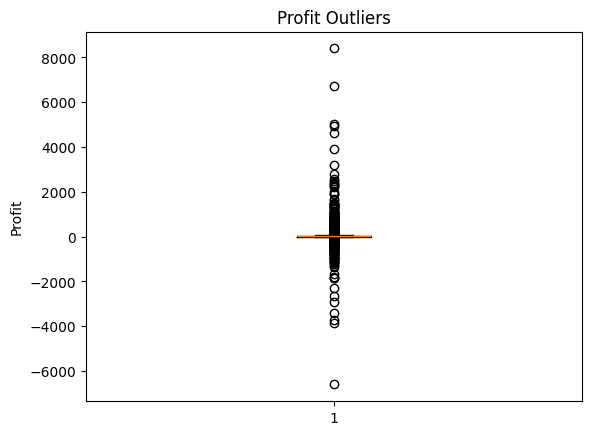

In [28]:
import matplotlib.pyplot as plt

plt.boxplot(df['Profit'])
plt.title('Profit Outliers')
plt.ylabel('Profit')
plt.show()


In [27]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.3 MB 5.8 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/8.3 MB 4.1 MB/s eta 0:00:02
   -------- ------------------------------- 1.8/8.3 MB 3.1 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.3 MB 2.8 MB/s eta 0:00:03
   ------------ --------------------------- 2.6/8.3 MB 2.7 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.3 MB 2.7 MB/s eta 0:00:02
   ----------------- ---------------------- 3.7/8.3 MB 2.6 MB/s eta 0:00:02
   --------------------- ------------------ 4.5/8.3 MB 2.8 MB/s eta 0:00:02
   --------------------- ------------------ 4.5/8.3 MB 2.8 MB/s eta 0:00:02
   ------------------------ --------------- 5.0/8.3 MB 2.4 MB/s eta 0:00:02
   ------------------------ --------------- 5.0/8.3 MB 2.4 MB/s eta 0:00:02
   --------------

In [30]:
df_cleaned = df[
    (df['Sales'] >= lower_bound_sales) & (df['Sales'] <= upper_bound_sales) &
    (df['Profit'] >= lower_bound_profit) & (df['Profit'] <= upper_bound_profit)
]


In [31]:
# Check min/max after cleaning
print("Sales range after cleaning:", df_cleaned['Sales'].min(), "to", df_cleaned['Sales'].max())
print("Profit range after cleaning:", df_cleaned['Profit'].min(), "to", df_cleaned['Profit'].max())

# Verify count reduction
print("Original dataset size:", df.shape[0])
print("Cleaned dataset size:", df_cleaned.shape[0])
print("Number of rows removed:", df.shape[0] - df_cleaned.shape[0])


Sales range after cleaning: 0.444 to 483.136
Profit range after cleaning: -38.1114 to 68.364
Original dataset size: 10113
Cleaned dataset size: 7930
Number of rows removed: 2183


In [33]:
print(df_cleaned.describe())

                          Order Date                      Ship Date  \
count                           7930                           7930   
mean   2016-05-03 13:41:30.491803392  2016-05-07 10:58:48.272383232   
min              2014-01-03 00:00:00            2014-01-07 00:00:00   
25%              2015-06-04 00:00:00            2015-06-09 00:00:00   
50%              2016-06-26 00:00:00            2016-06-28 00:00:00   
75%              2017-05-11 00:00:00            2017-05-14 18:00:00   
max              2017-12-30 00:00:00            2018-01-05 00:00:00   
std                              NaN                            NaN   

             Sales     Quantity     Discount       Profit  
count  7930.000000  7930.000000  7930.000000  7930.000000  
mean     69.442820     3.488651     0.150441    10.765377  
min       0.444000     1.000000     0.000000   -38.111400  
25%      13.760000     2.000000     0.000000     2.173950  
50%      34.690000     3.000000     0.200000     7.273200  


In [35]:
date_errors = df[df['Ship Date'] < df['Order Date']]
print(f"Number of inconsistent date records: {len(date_errors)}")
date_errors.head(10)

Number of inconsistent date records: 204


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
58,CA-2016-111682,2016-06-26,2016-06-18,First Class,TB-21055,Consumer,United States,Troy,New York,East,OFF-PA-10000587,Office Supplies,Paper,"Array Parchment Paper, Assorted Colors",14.560,2.0,0.00,6.9888
80,CA-2016-127208,2016-06-26,2016-06-15,First Class,SC-20770,Corporate,United States,Decatur,Alabama,South,OFF-BI-10002309,Office Supplies,Binders,Avery Heavy-Duty EZD Binder With Locking Rings,16.740,3.0,0.00,8.0352
104,US-2015-156867,2016-06-26,2015-11-17,Standard Class,LC-16870,Consumer,United States,Aurora,Colorado,West,FUR-FU-10004006,Furniture,Furnishings,"Deflect-o DuraMat Lighweight, Studded, Beveled...",102.360,3.0,0.20,-3.8385
108,Unknown_Order ID,2017-11-23,2016-06-28,Standard Class,JM-15250,Consumer,United States,Charlotte,North Carolina,South,OFF-AR-10000390,Office Supplies,Art,Newell Chalk Holder,3.304,1.0,0.20,1.0738
124,US-2014-152030,2016-06-26,2014-12-28,Second Class,AD-10180,Home Office,United States,Houston,Texas,Central,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,600.558,3.0,0.30,-8.5794
142,CA-2017-106180,2017-09-18,2016-06-28,Standard Class,SH-19975,Corporate,United States,San Francisco,California,West,OFF-EN-10004030,Office Supplies,Envelopes,Convenience Packs of Business Envelopes,10.860,3.0,0.00,5.1042
187,CA-2016-157000,2016-07-16,2016-06-28,Standard Class,AM-10360,Corporate,United States,Grand Prairie,Texas,Central,OFF-ST-10001328,Office Supplies,Storage,"Personal Filing Tote with Lid, Black/Gray",37.224,3.0,0.20,3.7224
231,US-2017-100930,2017-04-07,2016-06-28,Standard Class,CS-12400,Home Office,United States,Tampa,Florida,South,FUR-TA-10001705,Furniture,Tables,Bush Advantage Collection Round Conference Table,233.860,2.0,0.45,-102.0480
240,CA-2016-157749,2016-06-26,2016-06-09,Second Class,KL-16645,Consumer,United States,Chicago,Illinois,Central,TEC-PH-10000011,Technology,Phones,PureGear Roll-On Screen Protector,31.984,2.0,0.20,11.1944
326,US-2016-141544,2016-08-30,2016-06-28,First Class,PO-18850,Consumer,United States,Philadelphia,Pennsylvania,East,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,54.594,3.0,0.40,-67.8762


In [5]:
print(df.dtypes)

Unnamed: 0        int64
Order ID         object
Order Date       object
Ship Date        object
Ship Mode        object
Customer ID      object
Segment          object
Country          object
City             object
State            object
Region           object
Product ID       object
Category         object
Sub-Category     object
Product Name     object
Sales           float64
Quantity        float64
Discount        float64
Profit          float64
dtype: object


In [6]:
print(df.duplicated().sum())

0


In [7]:
print(df.isnull().sum())

Unnamed: 0      0
Order ID        0
Order Date      0
Ship Date       0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [8]:
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], errors="coerce")
df["Date_Diff"] = (df["Ship Date"] - df["Order Date"]).dt.days
df.loc[df["Date_Diff"] < 0, "Ship Date"] = df.loc[df["Date_Diff"] < 0, "Order Date"]
df_cleaned = df[df["Date_Diff"] <= 180].copy()

# Drop helper column
df_cleaned.drop(columns=["Date_Diff"], inplace=True)

In [9]:
date_errors = df[df['Ship Date'] < df['Order Date']]
print(f"Number of inconsistent date records: {len(date_errors)}")
date_errors.head(10)

Number of inconsistent date records: 0


,Unnamed: 0,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Date_Diff


In [11]:
df_cleaned.to_csv("../data/cleandata/CleanedData1.csv")
print("sucessfully Cleaned the data")

sucessfully Cleaned the data


In [1]:
import pandas as pd
df=pd.read_csv("../data/cleandata/CleanedData1.csv")

In [2]:
print(df.duplicated().sum())

0


In [3]:
pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/17.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.0 MB ? eta -:--:--
    --------------------------------------- 0.3/17.0 MB ? eta -:--:--
    --------------------------------------- 0.3/17.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/17.0 MB 775.4 kB/s eta 0:00:22
   - -------------------------------------- 0.8/17.0 MB 918.9 kB/s eta 0:00:18
   -- ------------------------------------- 1.0/17.0 MB 1.1 MB/s eta 0:00:16
   -- ------------------------------------- 1.0/17.0 MB 1

In [ ]:
import mysql.connector.connect(
    host="localhost",
    user="root",
    password="nikhil"
    database
)

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7818 entries, 0 to 7817
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  7818 non-null   int64  
 1   Unnamed: 0    7818 non-null   int64  
 2   Order ID      7818 non-null   object 
 3   Order Date    7818 non-null   object 
 4   Ship Date     7818 non-null   object 
 5   Ship Mode     7818 non-null   object 
 6   Customer ID   7818 non-null   object 
 7   Segment       7818 non-null   object 
 8   Country       7818 non-null   object 
 9   City          7818 non-null   object 
 10  State         7818 non-null   object 
 11  Region        7818 non-null   object 
 12  Product ID    7818 non-null   object 
 13  Category      7818 non-null   object 
 14  Sub-Category  7818 non-null   object 
 15  Product Name  7818 non-null   object 
 16  Sales         7818 non-null   float64
 17  Quantity      7818 non-null   float64
 18  Discount      7818 non-null 

In [5]:
# Drop the unwanted columns
df.drop(columns=["Unnamed: 0", "Unnamed: 0.1"], inplace=True)

# Verify
print(df.shape)
print(df.columns)


(7818, 18)
Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7818 entries, 0 to 7817
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      7818 non-null   object 
 1   Order Date    7818 non-null   object 
 2   Ship Date     7818 non-null   object 
 3   Ship Mode     7818 non-null   object 
 4   Customer ID   7818 non-null   object 
 5   Segment       7818 non-null   object 
 6   Country       7818 non-null   object 
 7   City          7818 non-null   object 
 8   State         7818 non-null   object 
 9   Region        7818 non-null   object 
 10  Product ID    7818 non-null   object 
 11  Category      7818 non-null   object 
 12  Sub-Category  7818 non-null   object 
 13  Product Name  7818 non-null   object 
 14  Sales         7818 non-null   float64
 15  Quantity      7818 non-null   float64
 16  Discount      7818 non-null   float64
 17  Profit        7818 non-null   float64
dtypes: float64(4), object(14)
me

In [7]:
df = df.to_csv("../data/cleandata/FinalCleanedData.csv")
print ("sucessfully completed")

sucessfully completed


In [8]:
import pandas as pd

# Convert date columns to datetime type
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], errors="coerce")

# Verify the change
print(df[["Order Date", "Ship Date"]].dtypes)


TypeError: 'NoneType' object is not subscriptable

In [9]:
print(type(df))

<class 'NoneType'>


In [10]:
import pandas as pd
df=pd.read_csv("../data/cleandata/FinalCleanedData.csv")

In [11]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [12]:
import pandas as pd

# Convert date columns to datetime type
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], errors="coerce")

# Verify the change
print(df[["Order Date", "Ship Date"]].dtypes)


Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7818 entries, 0 to 7817
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    7818 non-null   int64         
 1   Order ID      7818 non-null   object        
 2   Order Date    7818 non-null   datetime64[ns]
 3   Ship Date     7818 non-null   datetime64[ns]
 4   Ship Mode     7818 non-null   object        
 5   Customer ID   7818 non-null   object        
 6   Segment       7818 non-null   object        
 7   Country       7818 non-null   object        
 8   City          7818 non-null   object        
 9   State         7818 non-null   object        
 10  Region        7818 non-null   object        
 11  Product ID    7818 non-null   object        
 12  Category      7818 non-null   object        
 13  Sub-Category  7818 non-null   object        
 14  Product Name  7818 non-null   object        
 15  Sales         7818 non-null   float64 

In [14]:
df.drop(columns=["Unnamed: 0"], inplace=True)

# Verify the change
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7818 entries, 0 to 7817
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      7818 non-null   object        
 1   Order Date    7818 non-null   datetime64[ns]
 2   Ship Date     7818 non-null   datetime64[ns]
 3   Ship Mode     7818 non-null   object        
 4   Customer ID   7818 non-null   object        
 5   Segment       7818 non-null   object        
 6   Country       7818 non-null   object        
 7   City          7818 non-null   object        
 8   State         7818 non-null   object        
 9   Region        7818 non-null   object        
 10  Product ID    7818 non-null   object        
 11  Category      7818 non-null   object        
 12  Sub-Category  7818 non-null   object        
 13  Product Name  7818 non-null   object        
 14  Sales         7818 non-null   float64       
 15  Quantity      7818 non-null   float64 

In [15]:
df.to_csv("../data/cleandata/FinalCleanedData1.csv", index=False)
print(" File saved successfully")


 File saved successfully


In [16]:
missing_values = df.isnull().sum()
print("🔍 Missing Values in Each Column:\n")
print(missing_values)


🔍 Missing Values in Each Column:

Order ID        0
Order Date      0
Ship Date       0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [17]:
duplicate_count = df.duplicated().sum()
print(f"🔁 Number of duplicate rows: {duplicate_count}")


🔁 Number of duplicate rows: 0


In [18]:
print(df.dtypes)


Order ID                object
Order Date      datetime64[ns]
Ship Date       datetime64[ns]
Ship Mode               object
Customer ID             object
Segment                 object
Country                 object
City                    object
State                   object
Region                  object
Product ID              object
Category                object
Sub-Category            object
Product Name            object
Sales                  float64
Quantity               float64
Discount               float64
Profit                 float64
dtype: object


In [20]:
import mysql.connector
import pandas as pd
mydb = mysql.connector.connect(
    host="localhost",
    user="jayanth",          # 👈 your MySQL username
    password="nikhil",  # 👈 your MySQL password
    database="superstore"     # 👈 database you created
)

cursor = mydb.cursor()
print("✅ Connection successful!")


ProgrammingError: 1045 (28000): Access denied for user 'jayanth'@'localhost' (using password: YES)

In [21]:
import pandas as pd

# Load your CSV file
df = pd.read_csv("C:/data analytic/data/cleandata/FinalCleanedData1.csv")

# Check number of rows
print("Number of rows in CSV file:", len(df))


Number of rows in CSV file: 7818
